# KinSight
A family-focused neural network to identify my household people and paws.

This is am image classifier based on pre-trained CNN ResNet.

In [7]:
# 1. PyTorch model and training necessities
import torch
import torch.nn.functional as F
from torchvision import models

# Image datasets and image manipulation
import torchvision
from torchvision import datasets, transforms

# Image display
import matplotlib.pyplot as plt
import numpy as np

# Class labels
classes = ('Eric', 'Jane', 'Marvin', 'Tobin', 'Wesley')


In [8]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # typical for ResNet
                         std=[0.229, 0.224, 0.225])
])


# Load the saved model, and make predications

In [16]:
# 1. Create the same model architecture
saved_model_path = "D:/dDev/AI_Computer_Vision/Projects/KinSight/model_20251107_160614_0_saved"
model = models.resnet18(weights='IMAGENET1K_V1')

# 2️. Replace final layer to match your number of classes
num_features = model.fc.in_features
model.fc = torch.nn.Linear(num_features, 5)  # must match your trained output classes

# 3. Load your trained weights
state_dict = torch.load(saved_model_path, map_location='cpu')
model.load_state_dict(state_dict)

# 4. Set to evaluation mode
model.eval()

print("Model loaded successfully!")

Model loaded successfully!


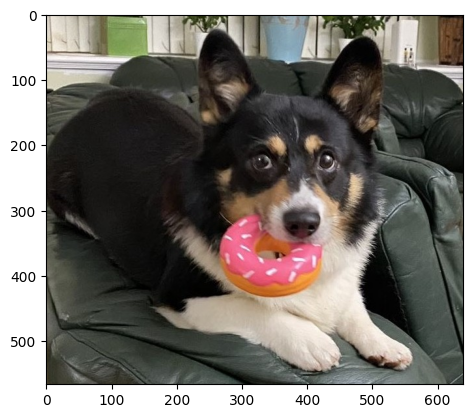

In [17]:
# Load a test image:

from PIL import Image

test_img = Image.open('family_dataset/test/Wesley/Wesley_t002.jpg').convert('RGB')

# Sanity check - Display the original image
test_img_data = np.asarray(test_img)
plt.imshow(test_img_data)
plt.show()

In [18]:
# Transform the test image
transformed_img = transform(test_img)

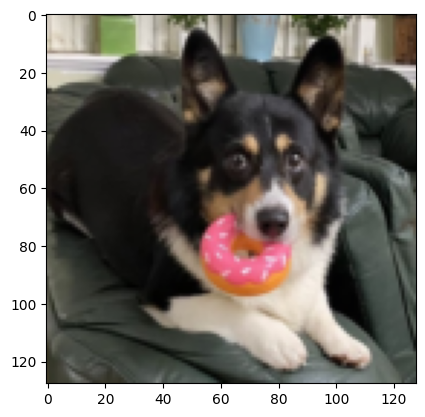

In [15]:
# Sanity check - again after image transformation
# --- Convert to NumPy for display (unnormalize first) ---
def imshow_tensor(tensor):
    # Clone to avoid modifying original
    image = tensor.clone().detach().cpu()
    image = image.numpy().transpose(1, 2, 0)  # C×H×W → H×W×C
    # Undo normalization if applied
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)
    plt.imshow(image)
    # plt.axis("off")
    plt.show()

imshow_tensor(transformed_img)

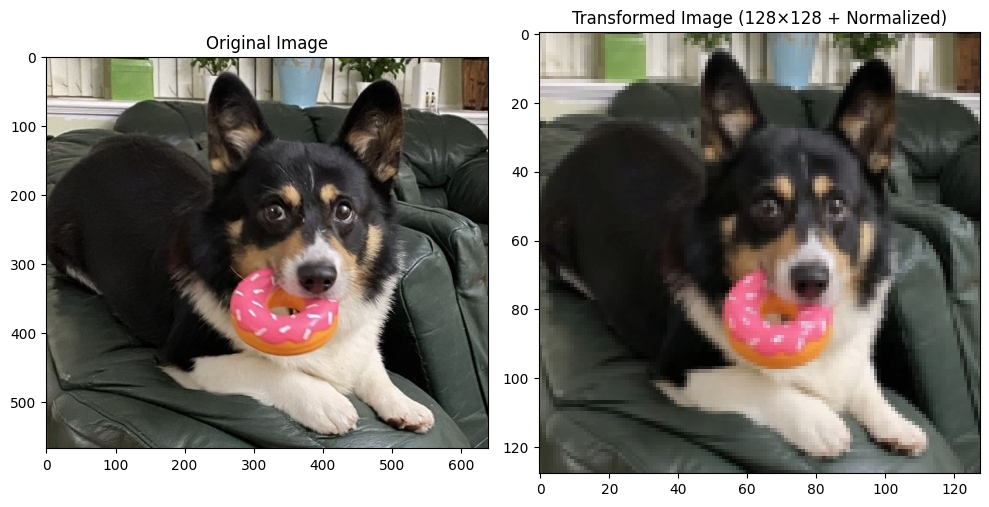

In [21]:
# Sanity check - To display the original vs transformed side by side

# --- Convert transformed tensor to NumPy image for display ---
def tensor_to_numpy(tensor):
    image = tensor.clone().detach().cpu().numpy().transpose(1, 2, 0)  # C×H×W → H×W×C
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean  # unnormalize
    image = np.clip(image, 0, 1)
    return image

transformed_np = tensor_to_numpy(transformed_img)

# --- Plot side-by-side ---
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original
axes[0].imshow(test_img)
axes[0].set_title("Original Image")
# axes[0].axis("off")

# Transformed
axes[1].imshow(transformed_np)
axes[1].set_title("Transformed Image (128×128 + Normalized)")
# axes[1].axis("off")

plt.tight_layout()
plt.show()

In [19]:

# Make a predication
input_img = transformed_img.unsqueeze(0)       # The model requires a dummy batch dimension
with torch.no_grad():
    output = model(input_img)
    output = F.softmax(output, dim=1)
    prediction_score, pred_label_idx = torch.topk(output, 1)
    pred_label_idx = pred_label_idx.squeeze().item()
    prediction_score = prediction_score.squeeze().item()

# print result
predicted_label = classes[pred_label_idx]
print(f"Predicted: { predicted_label }, ({ prediction_score })")

Predicted: Wesley, (0.8712059855461121)
